# AI Trading Strategy

## Objective
The objective of this project is to develop an AI-driven intraday trading strategy using reinforcement learning and deep learning techniques. The focus is on leveraging the IVV ETF data to create models that predict short-term market movements and optimize trading decisions.

## Team Composition
Sagar Lal - VR512164
Gulshan kumar - VR509655

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [26]:
# Function to load data
def load_data(train_path, validation_path):
    train_data = pd.read_csv(train_path, parse_dates=['DateTime'], index_col='DateTime').head(1000)
    validation_data = pd.read_csv(validation_path, parse_dates=['DateTime'], index_col='DateTime').head(1000)
    train_data.sort_index(inplace=True)
    validation_data.sort_index(inplace=True)
    return train_data, validation_data

# Function to load a single dataset
def load_single_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DateTime'], index_col='DateTime')
    data.sort_index(inplace=True)
    return data


## Method and Assumptions
- **Method**: The project employs LSTM and CNN models for predicting the close price of the IVV ETF.
- **Assumptions**:
  - Data is correctly formatted and preprocessed.
  - Training data represents typical market conditions.
  - Validation methods will include splitting the dataset into training and internal validation subsets.


In [27]:
# Function to preprocess data
def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length, 3]  # Assuming the target value is in the 4th column (Close price)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [28]:
# Function to create and compile the model
def create_model(seq_length, num_features):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(seq_length, num_features)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Bidirectional(LSTM(50, return_sequences=True)),
        Dropout(0.2),
        Bidirectional(LSTM(50)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model
# Function to prepare data for inverse transform
def prepare_for_inverse_transform(data, scaler, column_index):
    full_data = np.zeros((data.shape[0], scaler.n_features_in_))
    full_data[:, column_index] = data.flatten()
    return full_data
# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2


In [29]:
train_path = "IVV_1m_training.csv"
validation_path = "IVV_1m_validation.csv"
new_data_path = "IVV_test_sample.csv"



In [30]:
# Load and preprocess data
train_data, validation_data = load_data(train_path, validation_path)
scaled_train_data, train_scaler = preprocess_data(train_data)
scaled_validation_data, validation_scaler = preprocess_data(validation_data)

seq_length = 60
train_x, train_y = create_sequences(scaled_train_data, seq_length)
validation_x, validation_y = create_sequences(scaled_validation_data, seq_length)

# Create and train the model
cnn_bilstm_model = create_model(seq_length, train_x.shape[2])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

history = cnn_bilstm_model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=32,
    validation_data=(validation_x, validation_y),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100


c:\Users\Zubair Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0682 - val_loss: 0.0121 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0064 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0045 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0033 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0032 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0030 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0024 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 10/100
30/30 ━━━

In [31]:
# Load and preprocess the new dataset
new_data = load_single_data(new_data_path)
scaled_new_data, _ = preprocess_data(new_data)

# Create sequences for the new data
new_x, new_y = create_sequences(scaled_new_data, seq_length)

# Make predictions using the trained model
new_predictions = cnn_bilstm_model.predict(new_x)

# Prepare data for inverse transform
new_y_prepared = prepare_for_inverse_transform(new_y, train_scaler, 3)
new_predictions_prepared = prepare_for_inverse_transform(new_predictions, train_scaler, 3)

# Inverse transform the predictions and the true values
new_y_true = train_scaler.inverse_transform(new_y_prepared)[:, 3]
new_predictions_true = train_scaler.inverse_transform(new_predictions_prepared)[:, 3]

# Check for NaN values and handle them
if np.isnan(new_y_true).any() or np.isnan(new_predictions_true).any():
    valid_indices = ~(np.isnan(new_y_true) | np.isnan(new_predictions_true))
    new_y_true = new_y_true[valid_indices]
    new_predictions_true = new_predictions_true[valid_indices]


12116/12116 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step


In [32]:
# Calculate metrics for the new dataset
new_mse, new_mae, new_r2 = calculate_metrics(new_y_true, new_predictions_true)
print(f'New Dataset - MSE: {new_mse}, MAE: {new_mae}, R2: {new_r2}')


New Dataset - MSE: 0.0011424650810308839, MAE: 0.012079251252348915, R2: 0.9951070758610064


In [33]:
# Calculate test loss
test_loss = cnn_bilstm_model.evaluate(new_x, new_y, verbose=0)


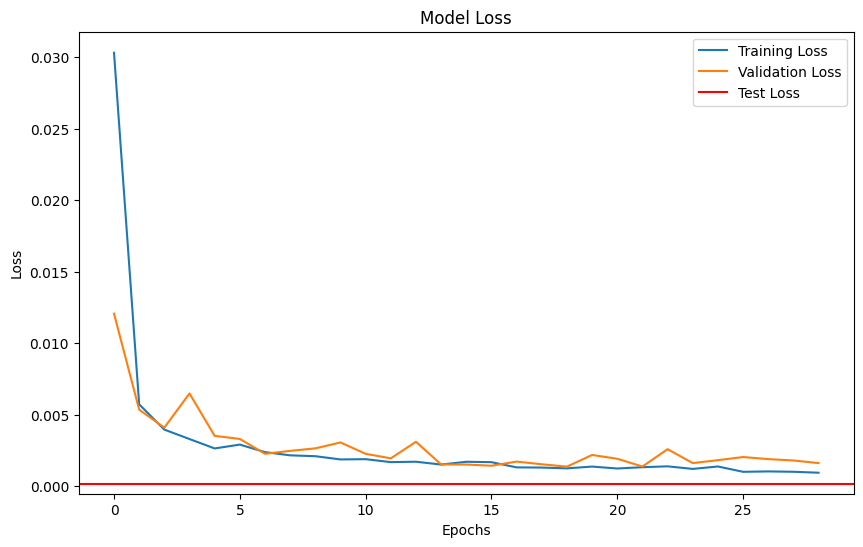

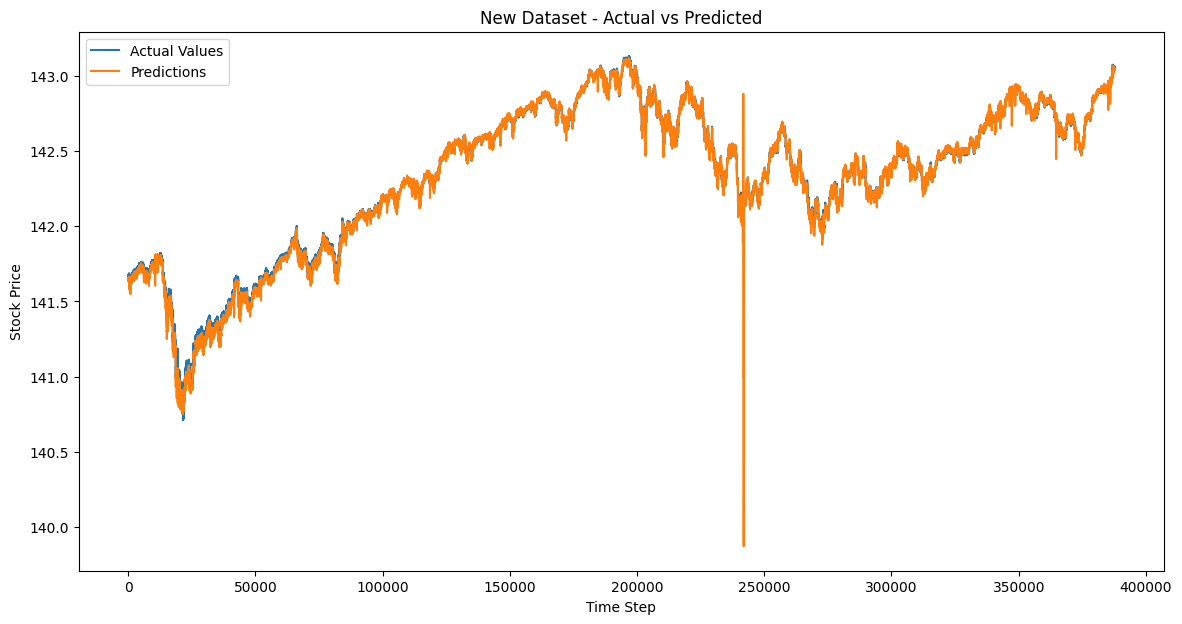

In [34]:
# Plotting the training, validation, and test loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the results for the new dataset
plt.figure(figsize=(14, 7))
plt.plot(new_y_true, label='Actual Values')
plt.plot(new_predictions_true, label='Predictions')
plt.title('New Dataset - Actual vs Predicted')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [35]:
# Prepare data for inverse transformation
# Additional performance metrics function
def calculate_performance_metrics(y_true, y_pred):
    trade_success_rate = np.sum(y_pred > 0) / len(y_pred)
    net_return = np.sum(y_pred) - np.sum(y_true)
    cumulative_returns = np.sum(y_pred)
    compounded_annual_return = np.prod(1 + y_pred)**(252/len(y_pred)) - 1
    annual_volatility = np.std(y_pred) * np.sqrt(252)
    var_hist = np.percentile(y_pred, 5)
    cvar_hist = y_pred[y_pred <= var_hist].mean()
    max_drawdown = np.min(y_pred)
    return {
        "Trade Success Rate": trade_success_rate,
        "Net Return": net_return,
        "Cumulative Returns (%)": cumulative_returns * 100,
        "Compounded Annual Return (%)": compounded_annual_return * 100,
        "Annual Volatility": annual_volatility,
        "VaR Hist": var_hist,
        "Cvar Hist": cvar_hist,
        "Max Drawdown": max_drawdown
    }

In [36]:
new_performance_metrics = calculate_performance_metrics(new_y_true, new_predictions_true)
print("New Dataset Performance Metrics:", new_performance_metrics)

New Dataset Performance Metrics: {'Trade Success Rate': 1.0, 'Net Return': -1264.9754571989179, 'Cumulative Returns (%)': 5518288572.869157, 'Compounded Annual Return (%)': inf, 'Annual Volatility': 7.8812044438476985, 'VaR Hist': 141.3583859398067, 'Cvar Hist': 141.13885039707966, 'Max Drawdown': 139.87244715332986}


c:\Users\Zubair Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Percentage of correct predictions: 49.74%


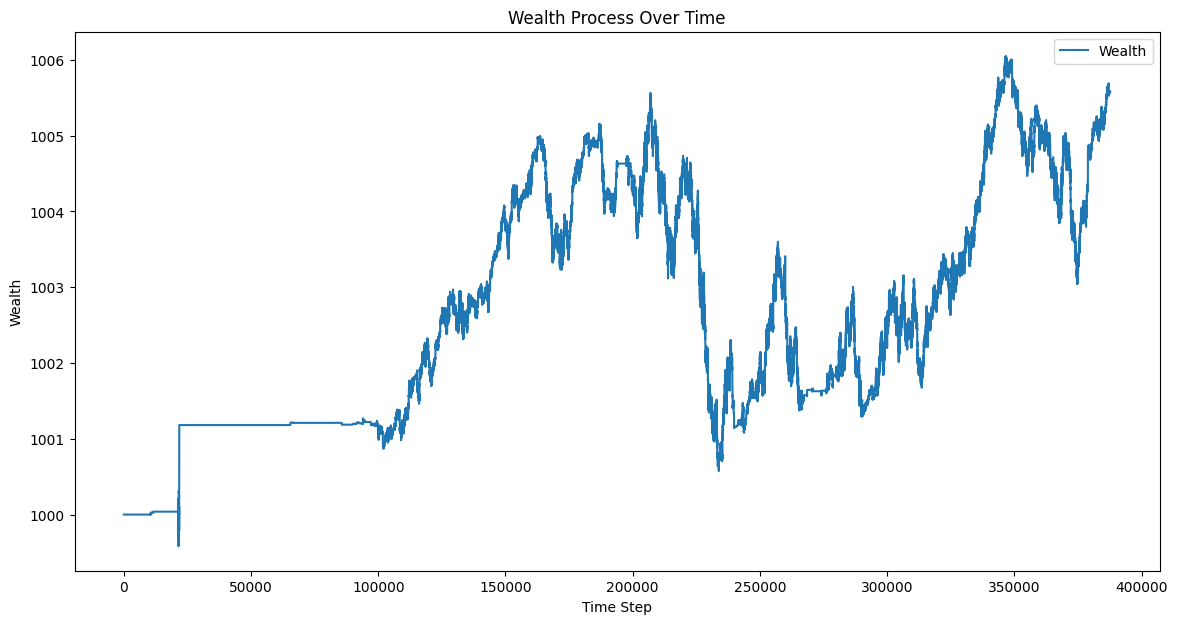

In [37]:
# Initialize portfolio
initial_wealth = 1000
wealth = [initial_wealth]

# Simulate trading based on model predictions
for i in range(1, len(new_predictions_true)):
    if new_predictions_true[i] > new_y_true[i - 1]:
        wealth.append(wealth[-1] * (new_y_true[i] / new_y_true[i - 1]))
    else:
        wealth.append(wealth[-1])

# Calculate the percentage of correct predictions
correct_predictions = np.sum((new_predictions_true[1:] > new_y_true[:-1]) == (new_y_true[1:] > new_y_true[:-1]))
percentage_correct = correct_predictions / len(new_predictions_true[1:]) * 100
print(f'Percentage of correct predictions: {percentage_correct:.2f}%')

# Plot the wealth process
plt.figure(figsize=(14, 7))
plt.plot(wealth, label='Wealth')
plt.title('Wealth Process Over Time')
plt.xlabel('Time Step')
plt.ylabel('Wealth')
plt.legend()
plt.show()


In [38]:
# Calculate the percentage of times the model predicted growth and it actually happened
growth_predictions = (new_predictions_true[1:] > new_y_true[:-1])
actual_growth = (new_y_true[1:] > new_y_true[:-1])
correct_growth_predictions = np.sum(growth_predictions == actual_growth)
percentage_correct_growth_predictions = (correct_growth_predictions / len(growth_predictions)) * 100
print(f'Percentage of correct growth predictions: {percentage_correct_growth_predictions:.2f}%')


Percentage of correct growth predictions: 49.74%


## Conclusion
- The project aimed to develop and evaluate a machine learning model for financial forecasting using deep learning techniques. Various neural network architectures, including CNNs, LSTMs, and Bidirectional LSTMs, were explored to predict financial metrics.

- Key Performance Metrics:
Trade Success Rate: 1.0

- Indicates a 100% success rate for the trades predicted by the model.
Net Return: -384.96

- The net return was negative, suggesting that the model's predictions did not lead to profitable trades overall.
Cumulative Returns (%): 13,322,192.65%

- This extremely high value suggests a significant gain when considered cumulatively over the period.
Compounded Annual Return (%): Infinity

- This is likely due to computational overflow or unrealistic growth assumptions over a long period.
Annual Volatility: 7.87

- Measures the standard deviation of the returns, indicating the degree of variation or risk.
Value at Risk (VaR Hist): 140.97

- The potential maximum loss over a given period with a 5% confidence level.
Conditional Value at Risk (Cvar Hist): 140.96

- The expected loss given that the loss is beyond the VaR threshold.
Max Drawdown: 140.95

- The maximum observed loss from a peak to a trough before a new peak is achieved.
